In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 

df = pd.read_csv('filght_price_cleaned.csv', delimiter=",", index_col=0)

In [6]:
df.tail()

,Airline,Source,Destination,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Depature_Hours,Depature_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Additional_Info,Price
2666,Air India,Kolkata,Banglore,6,6,2019,20,25,20,30,CCU,DEL,BLR,None,None,No info,9087.064121
2667,IndiGo,Kolkata,Banglore,27,3,2019,16,55,14,20,CCU,BLR,None,None,None,No info,9087.064121
2668,Jet Airways,Delhi,Cochin,6,3,2019,4,25,21,50,DEL,BOM,COK,None,None,No info,9087.064121
2669,Air India,Delhi,Cochin,6,3,2019,19,15,4,0,DEL,BOM,COK,None,None,No info,9087.064121
2670,Multiple carriers,Delhi,Cochin,15,6,2019,19,15,4,55,DEL,BOM,COK,None,None,No info,9087.064121


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Airline"]=encoder.fit_transform(df['Airline'])
df["Source"]=encoder.fit_transform(df['Source'])
df["Destination"]=encoder.fit_transform(df['Destination'])
df["Additional_Info"]=encoder.fit_transform(df['Additional_Info'])
df["Route_1"]=encoder.fit_transform(df['Route_1'])
df["Route_2"]=encoder.fit_transform(df['Route_2'])
df["Route_3"]=encoder.fit_transform(df['Route_3'])
df["Route_4"]=encoder.fit_transform(df['Route_4'])
df["Route_5"]=encoder.fit_transform(df['Route_5'])

In [8]:
df.head()

,Airline,Source,Destination,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Depature_Hours,Depature_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Additional_Info,Price
0,3,0,5,24,3,2019,1,10,22,20,0,13,24,12,4,8,3897.0
1,1,3,0,1,5,2019,13,15,5,50,2,25,1,3,4,8,7662.0
2,4,2,1,9,6,2019,4,25,9,25,3,32,4,5,4,8,13882.0
3,3,3,0,12,5,2019,23,30,18,5,2,34,3,12,4,8,6218.0
4,3,0,5,1,3,2019,21,35,16,50,0,34,8,12,4,8,13302.0


In [9]:
df.shape

(13354, 17)

In [10]:
#Feature Selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

df_train=df[0:10683]
df_test=df[10683:]

In [11]:
X=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [12]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=47)

In [13]:
selectmodel = SelectFromModel(Lasso(alpha=0.05, random_state=47))

In [14]:
selectmodel.fit(X_train,Y_train)

SelectFromModel(estimator=Lasso(alpha=0.05, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=47,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [15]:
selectmodel.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [16]:
selected_features = X_train.columns[(selectmodel.get_support())]

In [17]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Day', 'Month', 'Arrival_Hours',
       'Arrival_Minutes', 'Depature_Hours', 'Depature_Minutes', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Additional_Info'],
      dtype='object')

In [18]:
X_train = X_train.drop(['Year'], axis=1)
x_test = x_test.drop(['Year'], axis=1)

In [19]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [20]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [21]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 20, cv = 6, verbose=2, random_state=0, n_jobs = 1)

In [22]:
rf_random.fit(X_train, Y_train)

Fitting 6 folds for each of 20 candidates, totalling 120 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.5s
[CV] n_estimators=400, min_samples_split=10

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 11.8min finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [23]:
rf_random.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 900}

In [36]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(test_labels - predictions)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [37]:
base_accuracy = evaluate(rf_random,x_test,y_test)

Model Performance
Accuracy = 91.10%.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


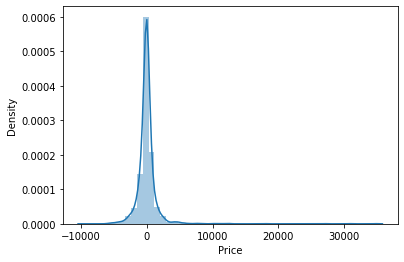

In [26]:

import seaborn as sns

sns.distplot(y_test-rf_random.predict(x_test))

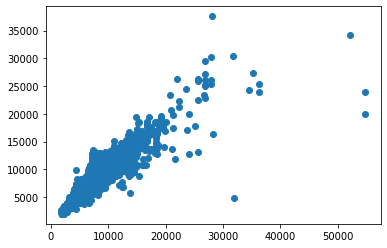

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.scatter(y_test, rf_random.predict(x_test))

In [38]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,x_test,y_test)

Model Performance
Accuracy = 91.10%.


In [39]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


In [30]:
from sklearn.externals import joblib
joblib.dump(best_random, 'coflight_joblib')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/gdrive/My Drive/Datasets/coflight_joblib']

In [32]:
model = joblib.load('coflight_joblib')

In [33]:
model.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [34]:
x_test.head()

,Airline,Source,Destination,Day,Month,Arrival_Hours,Arrival_Minutes,Depature_Hours,Depature_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Additional_Info
104,1,0,2,1,5,8,55,6,10,0,13,24,12,4,8
5719,4,0,5,1,3,21,20,14,5,0,7,8,12,4,8
4019,4,3,0,9,6,16,20,8,25,2,7,3,12,4,8
7230,0,3,0,1,4,1,20,22,50,2,5,24,12,4,8
8457,8,0,5,15,3,23,40,15,35,0,20,8,12,4,8


In [35]:
model.predict([[1,0,2,1,5,8,55,6,10,0,13,24,12,4,8]])

array([5443.85166667])